# Necessary imports for data analysis

In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Brief look at the data

In [3]:
df = pd.read_csv('../transactions.csv')

In [ ]:
# Look at the first few rows of the dataframe
df.head()

,id,account_id,description,description_raw,category,currency_code,amount,balance,date,status,type,provider_code,created_at,updated_at,payment_data,credit_card_data,merchant
0,00101b10-8204-4ce3-bea0-68c2f152db4a,bccb05e6-5f09-4aee-b8e4-719d85c09692,PIX ENVIADO Joao Vitor Sousa Escudero,PIX ENVIADO Joao Vitor Sousa Escudero,Transferência mesma titularidade,BRL,-1012.58,NaN,2025-08-01 15:01:28.374,POSTED,DEBIT,NaN,2025-08-02 04:16:04.527,2025-08-06 04:21:48.072,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,NaN
1,00219086-4722-439e-b285-7f133acde977,bccb05e6-5f09-4aee-b8e4-719d85c09692,RECARGA TELEFONE CELULAR IB 11 *****0859 TIM...,RECARGA TELEFONE CELULAR IB 11 *****0859 TIM...,Telecomunicação,BRL,-20.00,NaN,2025-07-21 18:18:57.776,POSTED,DEBIT,NaN,2025-07-29 13:47:58.698,2025-07-30 04:30:22.849,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,"{""cnae"":""6110801"",""cnpj"":""02421421000111"",""nam..."
2,0071a75f-dd2b-490d-b06a-1d84963d3b49,bccb05e6-5f09-4aee-b8e4-719d85c09692,PIX RECEBIDO JOAO VITOR SOUSA ESCUDERO,PIX RECEBIDO JOAO VITOR SOUSA ESCUDERO,Transferência mesma titularidade,BRL,200.00,NaN,2025-04-24 08:09:26.323,POSTED,CREDIT,NaN,2025-07-29 13:47:58.763,2025-07-30 04:30:22.886,"{""payer"":{""name"":null,""branchNumber"":""0001"",""a...",NaN,NaN
3,00b6e801-b9a0-40c6-be2b-e859b7625f4b,bccb05e6-5f09-4aee-b8e4-719d85c09692,PIX ENVIADO Ff Tech E Participacoes L,PIX ENVIADO Ff Tech E Participacoes L,Serviços digitais,BRL,-42.33,NaN,2025-07-18 21:46:05.201,POSTED,DEBIT,NaN,2025-07-29 13:47:58.7,2025-07-30 04:30:22.85,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,"{""cnae"":""6202300"",""cnpj"":""37571055000161"",""nam..."
4,00c8c46d-3d0e-4298-b9d9-fcabc9d9076c,bccb05e6-5f09-4aee-b8e4-719d85c09692,DEBITO VISA ELECTRON BRASIL 25/06 57.326.384...,DEBITO VISA ELECTRON BRASIL 25/06 57.326.384...,Transferência para terceiros - Débito,BRL,-87.00,NaN,2025-06-25 18:21:35.509,POSTED,DEBIT,NaN,2025-07-29 13:47:58.725,2025-07-30 04:30:22.861,"{""payer"":{""name"":null,""branchNumber"":null,""acc...",NaN,NaN


In [ ]:
# Check the shape of the dataframe
df.shape

(841, 17)

In [ ]:
# Get info about the dataframe, like data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                841 non-null    object 
 1   account_id        841 non-null    object 
 2   description       841 non-null    object 
 3   description_raw   841 non-null    object 
 4   category          841 non-null    object 
 5   currency_code     841 non-null    object 
 6   amount            841 non-null    float64
 7   balance           0 non-null      float64
 8   date              841 non-null    object 
 9   status            841 non-null    object 
 10  type              841 non-null    object 
 11  provider_code     0 non-null      float64
 12  created_at        841 non-null    object 
 13  updated_at        841 non-null    object 
 14  payment_data      841 non-null    object 
 15  credit_card_data  0 non-null      float64
 16  merchant          319 non-null    object 
dt

In [ ]:
# Check for missing values in each column
df.isnull().sum()

id                    0
account_id            0
description           0
description_raw       0
category              0
currency_code         0
amount                0
balance             841
date                  0
status                0
type                  0
provider_code       841
created_at            0
updated_at            0
payment_data          0
credit_card_data    841
merchant            522
dtype: int64

# A bit of data processing

In [8]:
print(f"Total Transactions: {df.shape[0]}")

Total Transactions: 841


In [9]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 841 rows and 17 columns.


In [ ]:
# Converting date column and creating new date columns for analysis
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['year_month'] = df['date'].dt.to_period('M')

In [12]:
# Splitting debits and turning amounts to absolute values for easier analysis
df['is_debit'] = df['amount'] < 0
df['amount_abs'] = np.abs(df['amount'])

In [13]:
# Taking a look at the analysed period
print(f"Data covers from {df['date'].min().date()} to {df['date'].max().date()}")

Data covers from 2025-04-07 to 2025-08-05


## 1. Quantitative Analysis

In [ ]:
# The dataframe with only debit transactions
df_debits = df[df['is_debit']].copy()

In [56]:
df_debits.shape

(647, 23)

### Analysing the main statistics per category for debits

In [61]:
# Descriptive Statistics for Debit Transactions by Category
debits_category_stats = df_debits.groupby('category')['amount_abs'].agg([
    ('total_transactions', 'count'),
    ('total_amount', 'sum'),
    ('average_amount', 'mean'),
    ('median_amount', 'median'),
    ('min_amount', 'min'),
    ('max_amount', 'max'),
    ('std_amount', 'std'),
    ('coeff_variation', lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else 0),
    ('Q25_amount', lambda x: np.percentile(x, 25)),
    ('Q75_amount', lambda x: np.percentile(x, 75))
]).round(2).sort_values(by='total_amount', ascending=False)

In [62]:
debits_category_stats

,total_transactions,total_amount,average_amount,median_amount,min_amount,max_amount,std_amount,coeff_variation,Q25_amount,Q75_amount
category,,,,,,,,,,
Transferência mesma titularidade,79,76220.38,964.81,250.00,1.00,21300.00,2667.96,2.75,100.00,900.00
Transferência - PIX,83,28603.07,344.62,200.00,10.00,2000.00,406.60,1.17,77.50,480.00
Compras,76,8835.24,116.25,40.00,5.90,2246.00,282.24,2.41,23.00,94.58
Supermercado,35,8264.73,236.14,69.90,8.00,2500.00,499.50,2.08,23.54,217.83
Serviços,37,8152.39,220.33,54.00,4.00,4103.73,666.61,2.98,31.08,207.86
"Restaurantes, bares e lanchonetes",62,6169.38,99.51,54.06,2.00,571.84,109.77,1.09,33.42,143.62
Aluguel de veículos,2,5690.08,2845.04,2845.04,221.27,5468.81,3710.57,0.92,1533.16,4156.92
Investimentos,70,5109.26,72.99,33.75,1.00,615.89,118.58,1.61,12.82,67.08
Livraria,2,3261.71,1630.86,1630.86,44.40,3217.31,2243.59,0.97,837.63,2424.08


Observations:

- total_transactions: Refers to the frequency of spends;
- total_amount: refers to the total amount for the particular category;
- average_amount, median_amount: works like a "default" spent per transaction;
- std_amount, coeff_variation: tell us about the variability in the data;
- min, max, Q25, Q75: tell us about the data distribution;
- percentage_of_total: is the "weight" of each category.

In [17]:
# Adding percentage of the total debits for each category
debits_category_stats['percentage_of_total'] = (debits_category_stats['total_amount'] / debits_category_stats['total_amount'].sum() * 100)\
    .round(2)

debits_category_stats['percentage_of_total'].sort_values(ascending=False)

category
Transferência mesma titularidade                   43.20
Transferência - PIX                                16.21
Compras                                             5.01
Supermercado                                        4.68
Serviços                                            4.62
Restaurantes, bares e lanchonetes                   3.50
Aluguel de veículos                                 3.22
Investimentos                                       2.90
Livraria                                            1.85
Postos de gasolina                                  1.81
Delivery de alimentos                               1.30
Vestiário                                           1.28
Transferência para terceiros - PIX                  0.99
Pedágios e pagamentos no veículo                    0.94
Serviços digitais                                   0.85
Hospedagem                                          0.72
Telecomunicação                                     0.70
Dentista              

In [55]:
# Overall Spending Statistics
total_spendings = df_debits['amount_abs'].sum()
total_received = df[~df['is_debit']]['amount_abs'].sum()

print(f"\nTotal Movement:")
print(f"Total Expenses: R$ {total_spendings:,.2f}")
print(f"Total Received: R$ {total_received:,.2f}")
print(f"Period Balance: R$ {(total_received - total_spendings):,.2f}")

print(f"\nGeneral Spending Statistics:")
print(f"Average Spend per Transaction: R$ {df_debits['amount_abs'].mean():,.2f}")
print(f"Average Spend: R$ {df_debits['amount_abs'].median():,.2f}")
print(f"Standard Deviation: R$ {df_debits['amount_abs'].std():,.2f}")
print(f"Largest Individual Expense: R$ {df_debits['amount_abs'].max():,.2f}")
print(f"Lowest Individual Expense: R$ {df_debits['amount_abs'].min():,.2f}")


Total Movement:
Total Expenses: R$ 176,445.28
Total Received: R$ 176,555.65
Period Balance: R$ 110.37

General Spending Statistics:
Average Spend per Transaction: R$ 272.71
Average Spend: R$ 70.97
Standard Deviation: R$ 1,036.25
Largest Individual Expense: R$ 21,300.00
Lowest Individual Expense: R$ 0.32


### 1.1 Monthly variation in total spending

In [19]:
# Mensal Aggregation
sazonality_debits = df_debits.groupby('year_month').agg(
    amount_abs_sum=('amount_abs', 'sum'),
    amount_abs_mean=('amount_abs', 'mean'),
    amount_abs_median=('amount_abs', 'median'),
    amount_abs_std=('amount_abs', 'std'),
    amount_abs_count=('amount_abs', 'count')
).round(2)

In [20]:
sazonality_debits

,amount_abs_sum,amount_abs_mean,amount_abs_median,amount_abs_std,amount_abs_count
year_month,,,,,
2025-04,24128.10,234.25,114.34,318.01,103
2025-05,71561.73,439.03,71.00,1891.23,163
2025-06,29840.37,152.25,50.00,285.05,196
2025-07,37709.71,227.17,68.13,556.72,166
2025-08,13205.37,695.02,109.91,1195.34,19


<Figure size 1200x600 with 0 Axes>

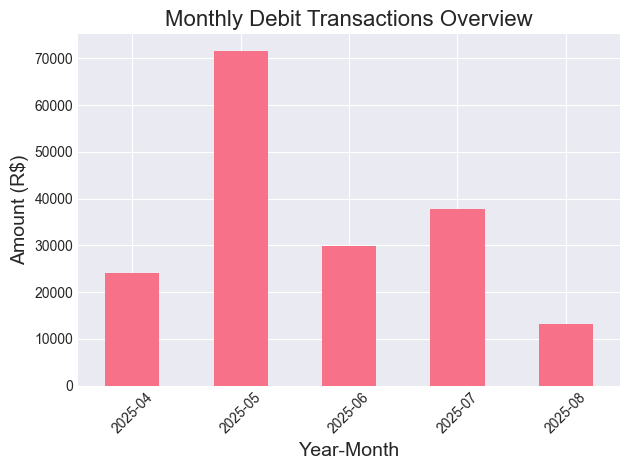

In [ ]:
# Plotting Monthly Debit Transactions Overview
sazonality_debits.index = sazonality_debits.index.astype(str)

plt.figure(figsize=(12, 6))
ax = sazonality_debits.plot(kind='bar', y='amount_abs_sum', legend=False)
ax.set_title('Monthly Debit Transactions Overview', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=14)
ax.set_ylabel('Amount (R$)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

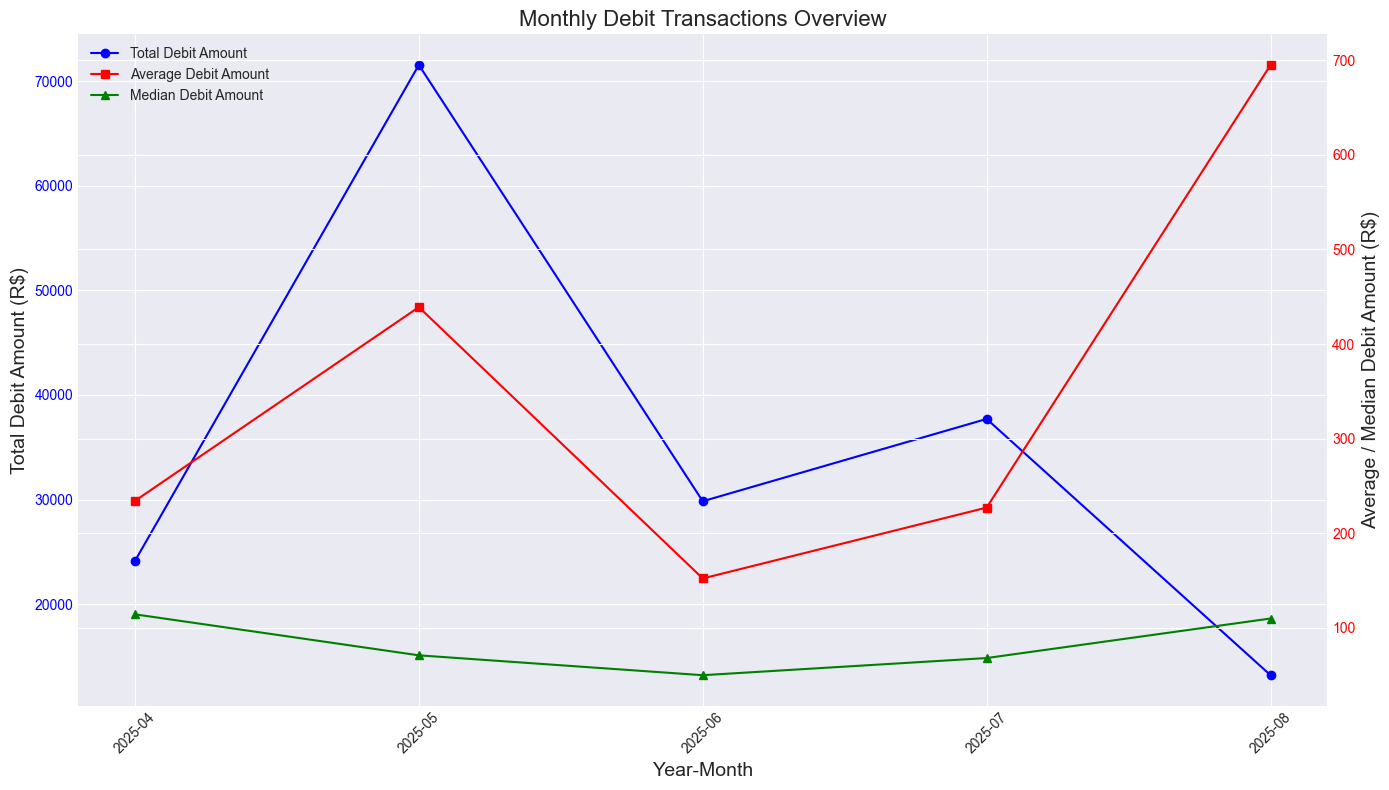

In [67]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.set_title('Monthly Debit Transactions Overview', fontsize=16)
ax1.set_xlabel('Year-Month', fontsize=14)
ax1.set_ylabel('Total Debit Amount (R$)', fontsize=14)

line1 = ax1.plot(sazonality_debits.index, sazonality_debits['amount_abs_sum'], marker='o', color='b', label='Total Debit Amount')
ax1.tick_params(axis='y', labelcolor='b')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('Average / Median Debit Amount (R$)', fontsize=14)
line2 = ax2.plot(sazonality_debits.index, sazonality_debits['amount_abs_mean'], marker='s', color='r', label='Average Debit Amount')
ax2.tick_params(axis='y', labelcolor='r')

line3 = ax2.plot(sazonality_debits.index, sazonality_debits['amount_abs_median'], marker='^', color='g', label='Median Debit Amount')
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
fig.tight_layout()
plt.show();

In [ ]:
# Applying a Linear Regression to identify some trends
x = np.arange(len(sazonality_debits))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, sazonality_debits['amount_abs_sum'])

In [23]:
if slope > 0:
    print(f"Growing tren -> Slope: {slope:.2f} ")
else:
    print(f"Decreasing trend -> Slope: {slope:.2f} ")
    
print(f"R-squared: {r_value**2:.4f}")

Decreasing trend -> Slope: -5569.75 
R-squared: 0.1580


Some important notes here:
- As we can see, on May the spent was a lot higher then the other four months. The debit value is around 71k, and the second higher value is on July, with a debit around 37k.
- The slope of -5569 indicates that, on average, the spents are decreasing along the way.
- The R^2 is informing to us how "strong" is this trend. In this particular case, our R2 is kind of low, around 0.15 (15%), which indicates a decreasing trend, but not so reliable. 

### 2. Identifying patterns

In [63]:
# Which categories have the greatest variability in spending?
top_variable_categories = debits_category_stats.sort_values(by='coeff_variation', ascending=False).head(5)

In [64]:
top_variable_categories

,total_transactions,total_amount,average_amount,median_amount,min_amount,max_amount,std_amount,coeff_variation,Q25_amount,Q75_amount
category,,,,,,,,,,
Serviços,37,8152.39,220.33,54.0,4.0,4103.73,666.61,2.98,31.08,207.86
Transferência mesma titularidade,79,76220.38,964.81,250.0,1.0,21300.00,2667.96,2.75,100.00,900.00
Compras,76,8835.24,116.25,40.0,5.9,2246.00,282.24,2.41,23.00,94.58
Supermercado,35,8264.73,236.14,69.9,8.0,2500.00,499.50,2.08,23.54,217.83
Pedágios e pagamentos no veículo,10,1663.51,166.35,18.3,12.4,922.35,284.16,1.62,14.02,213.92


In [37]:
# Are there any atypical behaviors (outliers) that deserve attention?
outliers_list = []

for category, stats in debits_category_stats.iterrows():
    q1 = stats['Q25_amount']
    q3 = stats['Q75_amount']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    category_outliers = df_debits[
        (df_debits['category'] == category) &
        (df_debits['amount_abs'] > upper_bound) &
        (df_debits['amount_abs'] < lower_bound)
    ]
    if not category_outliers.empty:
        for index, row in category_outliers.iterrows():
            outliers_list.append({
                'category': category,
                'amount_abs': row['amount_abs'],
                'date': row['date'],
                'description': row['description']
            })
if outliers_list:
    outliers_df = pd.DataFrame(outliers_list).sort_values(by='amount_abs', ascending=False)
    print("Transações Atípicas (Outliers) Identificadas:")
    print(outliers_df.to_string(index=False, float_format='R$ {:.2f}'.format))
else:
    print("No outliers detected.")

No outliers detected.


- The analysis of the data reveals some patterns. Spending variability, measured by the Coefficient of Variation (CV), is highest in categories such as 'Serviços' (CV: 2.98) e 'Transferência mesma titularidade' (CV: 2.75).   
- No outliers were detected in the spending data, indicating consistent spending behavior across all categories.
- The overall spending trend shows a decreasing pattern with an R-squared value of 0.1580, suggesting that the trend is weakly supported by the data.